# Assignment 1 - Probability, Linear Algebra, Programming, and Git

## *Vuk Lesi*
Netid:  *vl46*

# Probability and Statistics Theory

## 1
Let $f(x) = \begin{cases}
                0           & x < 0  \\
                \alpha x^2  & 0 \leq x \leq 2 \\
                0           & 2 < x
            \end{cases}$
            
For what value of $\alpha$ is $f(x)$ a valid probability density function?

*Note: for all assignments, write out all equations and math for all assignments using markdown and [LaTeX](https://tobi.oetiker.ch/lshort/lshort.pdf) and show all work*

**ANSWER**

For a function $f(x)$ to be a valid probability density function it must hold that  $\int_{x=-\infty}^{\infty}f(x)dx=1$. Thus, $\alpha=\frac{3}{8}$ since $\int_{x=0}^{2}f(x)dx=\alpha\frac{8}{3}=1$.

In [613]:
import scipy.integrate as integrate
import numpy as np
result = integrate.quad(lambda x: np.square(x), 0, 2) # Here we only integrate the segment of interest
print("alpha = {}".format(1/result[0]))

alpha = 0.37499999999999994


## 2
What is the cumulative distribution function (CDF) that corresponds to the following probability distribution function? Please state the value of the CDF for all possible values of $x$.

$f(x) = \begin{cases}
    \frac{1}{3} & 0 < x < 3 \\
    0           & \text{otherwise}
    \end{cases}$

**ANSWER**

The CDF is given as the integral from $-\infty$ to $x$ of the PDF. Thus, $F(x) = \int_{t=-\infty}^{x}f(t)dt=\begin{cases}
    0 & x \leq 0 \\
    \frac{1}{3}x & 0 < x \leq 3 \\
    1           & 3 < x
    \end{cases}$.

In [614]:
import sympy as sym
x = sym.symbols('x')
f = sym.Piecewise((0,x<=0), (1/3,x<=3), (0,True))
print(sym.integrate(f,(x,0,x))) # Here we symbolically integrate a piecewise defined function

Piecewise((0, x <= 0), (0.333333333333333*x, x <= 3), (1.00000000000000, True))


## 3
For the probability distribution function for the random variable $X$,

$f(x) = \begin{cases}
    \frac{1}{3} & 0 < x < 3 \\
    0           & \text{otherwise}
    \end{cases}$
    
what is the (a) expected value and (b) variance of $X$. *Show all work*.

**ANSWER**

(a) Expected value: $E[X]=\int_{x=-\infty}^{\infty}xf(x)dx=\int_{x=0}^{3}\frac{1}{3}xdx=\frac{3}{2}$.

(b) Variance: $Var[X]=E[(X-E[X])^2]=E[X^2]-E[X]^2=\int_{x=0}^{3}\frac{1}{3}x^2dx - (\frac{3}{2})^2=\frac{3}{4}$.



In [615]:
mu_x = sym.integrate(x*f,(x,-sym.oo,sym.oo))
print("mean = {}".format(mu_x)) # Here we symbolically integrate a piecewise defined function

sigma2_x = sym.integrate(x*x*f,(x,-sym.oo,sym.oo))-np.square(mu_x)
print("var = {}".format(sigma2_x)) # Here we symbolically integrate a piecewise defined function

mean = 1.50000000000000
var = 0.750000000000000


## 4
Consider the following table of data that provides the values of a discrete data vector $\mathbf{x}$ of samples from the random variable $X$, where each entry in $\mathbf{x}$ is given as $x_i$.

*Table 1. Dataset N=5 observations*

|        | $x_0$ | $x_1$ | $x_2$ | $x_3$ | $x_4$ |
|------  |-------|-------|-------|-------|-------|
|$\textbf{x}$| 2     | 3     | 10    | -1    | -1    |

What is the (a) mean, (b) variance, and the  of the data? 

*Show all work. Your answer should include the definition of mean, median, and variance in the context of discrete data.*

**ANSWER**

(a) Mean: $\mu=\frac{1}{N}\sum_{i=0}^{N-1}x_i=\frac{13}{5}$.

(b) Variance: $\sigma^2=\frac{1}{N-1}\sum_{i=0}^{N-1}(x_i-\mu)^2=\frac{406}{25}$.

The median of a set of samples can be computed by arranging the samples in a non-decreasing order. Then, if the number of samples is odd, the median is equal to the middle sample. Otherwise, the median is equal to the arighmetic mean of the two middle samples. For the given dataset $\{-1, -1, 2, 3, 10\}$, median is equal to $2$.

In [616]:
x = np.array([2, 3, 10, -1, -1])
mean = np.mean(x)
var = np.var(x)
median = np.median(x)
print(mean)
print(var)
print(median)

2.6
16.24
2.0


## 5
Review of counting from probability theory. 

(a) How many different 7-place licence plates are possible if the first 3 places only contain letters and the last 4 only contain numbers?

(b) How many different batting orders are possible for a baseball team with 9 players?

(c) How many batting orders of 5 players are possible for a team with 9 players total?

(d) Let's assume this class has 26 students and we want to form project teams. How many unique teams of 3 are possible?

*Hint: For each problem, determine if order matters, and if it should be calculated with or without replacement.*

**ANSWER**

(a) In this case, the number of different license plates should be calculated with replacement and considering that order matters. The number of possibilities is $26^3+10^4=175,760,000$.

(b) In this case, ordering does not matter if we assume no players are preferred, and the number of possibilities should be computed without replacement. The number of possibilities is $9!=362,880$.

(c) In this case, the coach first has ${9}\choose{5}$ possibilities to choose $5$ out of $9$ players, after which there are $5!$ possibilities to sort the players. The order does not matter at first, when a subgroup of $5$ is chosen, while it does matter when the batting team is chosen in the second step. There is no replacement. In total, there are ${9}\choose{5}$$\cdot 5! = 126\cdot120 = 15,120$ possibilities.

(d) In this case, ordering does not matter since unique teams of 3 students are needed and there is no replacement. In total, there are ${26}\choose{3}$$=\frac{26!}{3!(26-3)!}=2,600$ possibilities.


# Linear Algebra

## 6
**Matrix manipulations and multiplication**. Machine learning involves working with many matrices, so this exercise will provide you with the opportunity to practice those skills.

Let
$\mathbf{A} =  \begin{bmatrix}
1 & 2 & 3 \\
2 & 4 & 5 \\
3 & 5 & 6 
\end{bmatrix}$, $\mathbf{b} =  \begin{bmatrix}
-1  \\
3  \\
8  
\end{bmatrix}$, $\mathbf{c} =  \begin{bmatrix}
4  \\
-3  \\
6  
\end{bmatrix}$, and $\mathbf{I} =  \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 
\end{bmatrix}$

Compute the following or indicate that it cannot be computed:

1. $\mathbf{A}\mathbf{A}$
2. $\mathbf{A}\mathbf{A}^T$
3. $\mathbf{A}\mathbf{b}$
4. $\mathbf{A}\mathbf{b}^T$
5. $\mathbf{b}\mathbf{A}$
6. $\mathbf{b}^T\mathbf{A}$
7. $\mathbf{b}\mathbf{b}$
8. $\mathbf{b}^T\mathbf{b}$
9. $\mathbf{b}\mathbf{b}^T$
10. $\mathbf{b} + \mathbf{c}^T$
11. $\mathbf{b}^T\mathbf{b}^T$
12. $\mathbf{A}^{-1}\mathbf{b}$
13. $\mathbf{A}\circ\mathbf{A}$
14. $\mathbf{b}\circ\mathbf{c}$

*Note: The element-wise (or Hadamard) product is the product of each element in one matrix with the corresponding element in another matrix, and is represented by the symbol "$\circ$".*

**ANSWER**



In [617]:
A = np.array([[1,2,3],[2,4,5],[3,5,6]])
b = np.array([[-1],[3],[8]])
c = np.array([[4],[-3],[6]])
I = np.eye(3)

print("1. {}".format(A.dot(A))) # 1.

print("2. {}".format(A.dot(A.transpose()))) # 2.

print("3. {}".format(A.dot(b))) # 3.

# print("4. {}".format(A.dot(b.T))) # 4. Incompatible matrix/vector dimensions

# print("5. {}".format(b.dot(A))) # 5. Incompatible vector/matrix dimensions

print("6. {}".format((b.T).dot(A))) # 6.

# print("7. {}".format(b.dot(b))) # 7. Incompatible vector/vector dimensions

print("8. {}".format((b.T).dot(b))) # 8.

print("9. {}".format(b.dot(b.T))) # 9.

print("10. {}".format(b+c.T)) # 10. Exercize care here - result is matrix where element (j,k) is b(j)+c(k)

# print("11 {}".format((b.T).dot(b.T))) # 11. Incompatible vector/vector dimensions

print("12. {}".format(np.linalg.inv(A).dot(b))) # 12.

print("13. {}".format(A*A)) # 13.

print("14. {}".format(b*c)) # 14.

1. [[14 25 31]
 [25 45 56]
 [31 56 70]]
2. [[14 25 31]
 [25 45 56]
 [31 56 70]]
3. [[29]
 [50]
 [60]]
6. [[29 50 60]]
8. [[74]]
9. [[ 1 -3 -8]
 [-3  9 24]
 [-8 24 64]]
10. [[ 3 -4  5]
 [ 7  0  9]
 [12  5 14]]
12. [[ 6.]
 [ 4.]
 [-5.]]
13. [[ 1  4  9]
 [ 4 16 25]
 [ 9 25 36]]
14. [[-4]
 [-9]
 [48]]


## 6
**Eigenvectors and eigenvalues**. Eigenvectors and eigenvalues are useful for some machine learning algorithms, but the concepts take time to solidly grasp. For an intuitive review of these concepts, explore this [interactive website at Setosa.io](http://setosa.io/ev/eigenvectors-and-eigenvalues/). Also, the series of linear algebra videos by Grant Sanderson of 3Brown1Blue are excellent and can be viewed on youtube [here](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab).

1. Calculate the eigenvalues and corresponding eigenvectors of matrix $\mathbf{A}$ above, from the last question.
2. Choose one of the eigenvector/eigenvalue pairs, $\mathbf{v}$ and $\lambda$, and show that $\mathbf{A} \mathbf{v} = \lambda \mathbf{v}$. Also show that this relationship extends to higher orders: $\mathbf{A} \mathbf{A} \mathbf{v} = \lambda^2 \mathbf{v}$
3. Show that the eigenvectors are orthogonal to one another (e.g. their inner product is zero). This is true for real, symmetric matrices.

**ANSWER**



In [618]:
print("Part 1:")
[eigValues, eigVectors] = np.linalg.eig(A)
print("Eigenvalues: {}".format(eigValues))
print("Eigenvectors: {}\n".format(eigVectors))

print("Part 2:")
print("A*v = {}".format(A.dot(eigVectors[:,0])))
print("lambda*v = {}\n".format(eigValues[0]*eigVectors[:,0]))

print("A*A*v = {}".format(A.dot(A.dot(eigVectors[:,0]))))
print("lambda*lambda*v = {}\n".format(eigValues[0]*eigValues[0]*eigVectors[:,0]))

print("Part 3:")
print("v0*v1 = {}".format(eigVectors[:,0].dot(eigVectors[:,1])))
print("v0*v2 = {}".format(eigVectors[:,0].dot(eigVectors[:,2])))
print("v1*v2 = {}".format(eigVectors[:,1].dot(eigVectors[:,2])))


Part 1:
Eigenvalues: [ 11.34481428  -0.51572947   0.17091519]
Eigenvectors: [[-0.32798528 -0.73697623  0.59100905]
 [-0.59100905 -0.32798528 -0.73697623]
 [-0.73697623  0.59100905  0.32798528]]

Part 2:
A*v = [-3.72093206 -6.70488789 -8.36085845]
lambda*v = [-3.72093206 -6.70488789 -8.36085845]

A*A*v = [-42.2132832  -76.06570795 -94.85238636]
lambda*lambda*v = [-42.2132832  -76.06570795 -94.85238636]

Part 3:
v0*v1 = -2.220446049250313e-16
v0*v2 = -4.440892098500626e-16
v1*v2 = -1.0547118733938987e-15


# Numerical Programming

## 7
Speed comparison between vectorized and non-vectorized code. Begin by creating an array of 10 million random numbers using the numpy random.randn module. Compute the sum of the squares first in a for loop, then using Numpy's `dot` module. Time how long it takes to compute each and report the results and report the output. How many times faster is the vectorized code than the for loop approach?

*Note: all code should be well commented, properly formatted, and your answers should be output using the `print()` function as follows (where the # represents your answers, to a reasonable precision):

`Time [sec] (non-vectorized): ######`

`Time [sec] (vectorized):     ######`

`The vectorized code is ##### times faster than the vectorized code`

**ANSWER**

In [635]:
import numpy as np
import time

# Generate the random samples
x = np.random.randn(np.power(10,7))

# Compute the sum of squares the non-vectorized way (using a for loop)
t0 = time.time() # Get time before computation
sum = 0;
for i in x:
    sum += i*i
t1 = time.time() # Get time after computation

# Compute the sum of squares the vectorized way (using numpy)
t2 = time.time() # Get time before computation
sum = x.dot(x);
t3 = time.time() # Get time after computation

# Print the results
print("Time [sec] (non-vectorized): {}".format(t1-t0))
print("Time [sec] (vectorized): {}".format(t3-t2))
print("The vectorized code is {} times faster than the non-vectorized code.".format((t1-t0)/(t3-t2))) 
print("Note that the speed-up factor actually ranges from around 300 to around 1000.")
print("This is highly dependent on the current computational load imposed by other applications.")

Time [sec] (non-vectorized): 3.8685717582702637
Time [sec] (vectorized): 0.005315065383911133
The vectorized code is 727.8502668999238 times faster than the non-vectorized code.
Note that the speed-up factor actually ranges from around 300 to around 1000.
This is highly dependent on the current computational load imposed by other applications.


## 8
One popular Agile development framework is Scrum (a paradigm recommended for data science projects). It emphasizes the continual evolution of code for projects, becoming progressively better, but starting with a quickly developed minimum viable product. This often means that code written early on is not optimized, and that's a good thing - it's best to get it to work first before optimizing. Imagine that you wrote the following code during a sprint towards getting an end-to-end system working. Vectorize the following code and show the difference in speed between the current implementation and a vectorized version.

The function below computes the function $f(x,y) = x^2 - 2 y^2$ and determines whether this quantity is above or below a given threshold, `thresh=0`. This is done for $x,y \in \{-4,4\}$, over a 2,000-by-2,000 grid covering that domain.

(a) Vectorize this code and demonstrate (as in the last exercise) the speed increase through vectorization and (b) plot the resulting data - both the function $f(x,y)$ and the thresholded output - using [`imshow`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html?highlight=matplotlib%20pyplot%20imshow#matplotlib.pyplot.imshow) from `matplotlib`.

*Hint: look at the `numpy` [`meshgrid`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.meshgrid.html) documentation*

Time [sec] (non-vectorized): 6.581425666809082
Time [sec] (vectorized): 0.13253140449523926
The vectorized code is 49.65936709020161 times faster than the non-vectorized code.
Note that the speed-up factor varies and highly depends on the current computational load imposed by other applications.


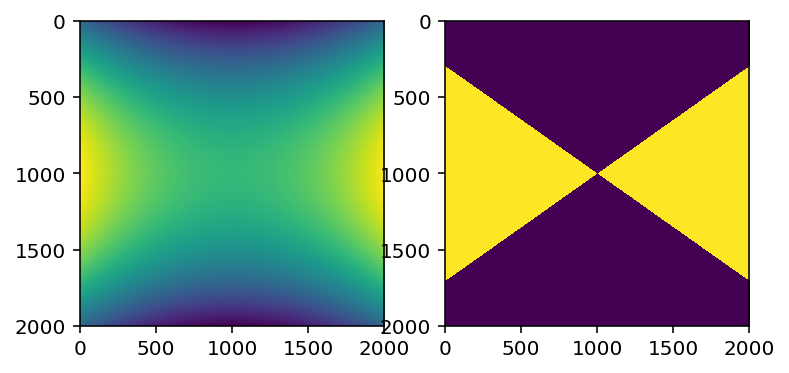

In [636]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import time
import matplotlib.pyplot as plt

# Initialize variables for this exerise
steps = 2000
threshold = 0
x = np.linspace(-4,4,num=steps)
y = np.linspace(-4,4,num=steps)


# Nonvectorized implementation
t0 = time.time() # Get time before computation
f1 = np.zeros((steps,steps))
flag1 = np.zeros((steps,steps), bool)
for xIdx, currX in enumerate(x):
    for yIdx, currY in enumerate(y):
        f1[xIdx,yIdx] = currX*currX-2*currY*currY # Compute f
        if f1[xIdx,yIdx] > threshold: # Test level
            flag1[xIdx,yIdx] = True
        else:
            flag1[xIdx,yIdx] = False
t1 = time.time() # Get time after computation

# Vectorized implementation
t2 = time.time() # Get time before computation
xx, yy = np.meshgrid(x, y);
f2 = xx*xx-2*yy*yy
flag2 = f2>threshold
t3 = time.time() # Get time after computation

# Print the time for each and the speed increase
print("Time [sec] (non-vectorized): {}".format(t1-t0))
print("Time [sec] (vectorized): {}".format(t3-t2))
print("The vectorized code is {} times faster than the non-vectorized code.".format((t1-t0)/(t3-t2))) 
print("Note that the speed-up factor varies and highly depends on the current computational load imposed by other applications.")

# Plot the result
plt.subplot(1,2,1)
plt.imshow(f2)
plt.subplot(1,2,2)
plt.imshow(f2>threshold)

plt.show()

## 9
This exercise will walk through some basic numerical programming exercises.
1. Synthesize $n=10^4$ normally distributed data points with mean $\mu=2$ and a standard deviation of $\sigma=1$. Call these observations from a random variable $X$, and call the vector of observations that you generate, $\textbf{x}$.
2. Calculate the mean and standard deviation of $\textbf{x}$ to validate (1) and provide the result to a precision of four significant figures.
3. Plot a histogram of the data in $\textbf{x}$ with 30 bins
4. What is the 90th percentile of $\textbf{x}$? The 90th percentile is the value below which 90% of observations can be found.
5. What is the 99th percentile of $\textbf{x}$?
6. Now synthesize $n=10^4$ normally distributed data points with mean $\mu=0$ and a standard deviation of $\sigma=3$. Call these observations from a random variable $Y$, and call the vector of observations that you generate, $\textbf{y}$.
7. Plot the histogram of the data in $\textbf{y}$ on a (new) plot with the histogram of $\textbf{x}$, so that both histograms can be seen and compared.
8. Using the observations from $\textbf{x}$ and $\textbf{y}$, estimate $E[XY]$

**ANSWER**

mean = 2.0156058098514533
std dev = 1.0013092181219156


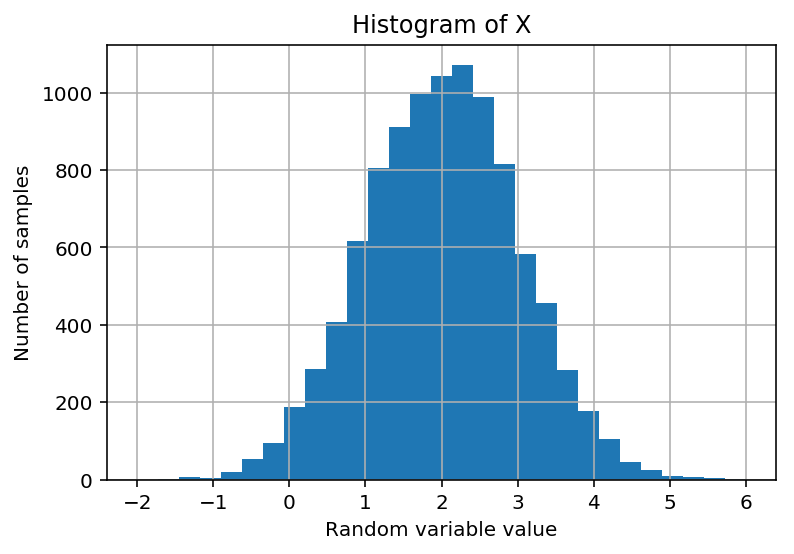

90th percentile is 3.31155371501325.
99th percentile is 4.321774863886758.


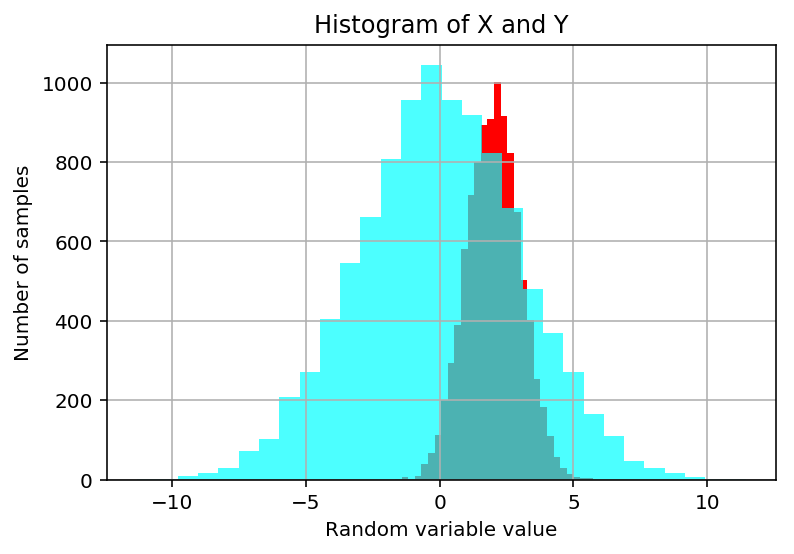

Under the assumption that X and Y are independent (x and y were independently drawn from their respective distributions): E[XY]=E[X]E[Y]=-0.012943658168492028


In [638]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt

sampleCount = np.power(10,4)

# 1
sigmaX = 1
muX = 2
x = sigmaX*np.random.randn(sampleCount)+muX # Generate random vector

# 2
meanX = np.mean(x)
stdDevX = np.std(x)
print("mean = {}".format(meanX, '.4f'))
print("std dev = {}".format(stdDevX, '.4f'))

# 3
binCount = 30
histX, binsX = np.histogram(x, bins=np.linspace(muX-4*sigmaX,muX+4*sigmaX,binCount))
plt.hist(x, binsX)
plt.xlabel("Random variable value")
plt.ylabel("Number of samples")
plt.title("Histogram of X")
plt.grid(True)
plt.show()

# 4
print("90th percentile is {}.".format(np.percentile(x,90)))

# 5
print("99th percentile is {}.".format(np.percentile(x,99)))

# 6
sigmaY = 3
muY = 0
y = sigmaY*np.random.randn(sampleCount)+muY # Generate random vector
meanY = np.mean(y)
stdDevY = np.std(y)

# 7
nX, binsX, patchesX = plt.hist(x, binCount, facecolor='red') # Redo with plt.hist for transparency
nY, binsY, patchesY = plt.hist(y, binCount, facecolor='cyan', alpha=0.7)

plt.xlabel("Random variable value")
plt.ylabel("Number of samples")
plt.title("Histogram of X and Y")
plt.grid(True)
plt.show()

# 8
print("Under the assumption that X and Y are independent (x and y were independently drawn from their respective distributions): E[XY]=E[X]E[Y]={}".format(meanX*meanY))

## 10
Estimate the integral of the function $f(x)$ on the interval $0\leq x < 2.5$ assuming we only know the following points from $f$:

*Table 1. Dataset containing n=5 observations*

| $x_i$ | 0.0 | 0.5 | 1.0 | 1.5 | 2.0 |
|-|-|-|-|-|-|
| $y_i$ | 6 | 7 | 8 | 4 | 1 |


**ANSWER**



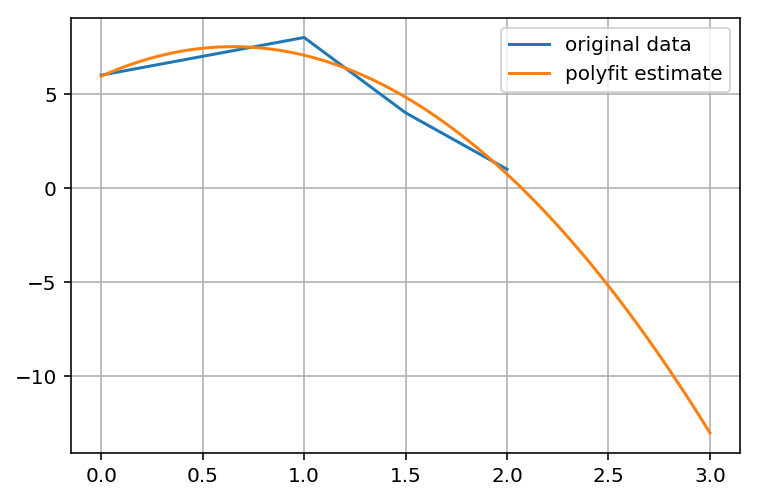

Integral over [0,2.5) is -10.60119047619046.


In [639]:
import scipy.integrate as int
x = [0,0.5,1,1.5,2] # Original x data
y = [6,7,8,4,1] # Original x data

dataPlt, = plt.plot(x, y) # Visualize date

pCoeffs = np.polyfit(x,y,2) # This is just one way of doing it - assume data has a quadratic trend and fit a polynomial
xRange = np.linspace(0,3,100)
yEst = np.polyval(pCoeffs, xRange) # Evaluate polynomial for plotting purposes

polyEstPlt, = plt.plot(xRange, yEst) # Plot fitted polynomial
plt.legend([dataPlt, polyEstPlt],['original data','polyfit estimate'])

plt.grid(True)
plt.show()

intLowLim = 0 # Lower integration limit
intHighLim = 2.5 # Higher integration limit
pCoeffsPrimitive = np.polyint(pCoeffs) # Indefinite ingegral of fitted polynomial
yIntegralEst = np.polyval(pCoeffsPrimitive, intLowLim)-np.polyval(pCoeffsPrimitive, intHighLim) # Evaluate primitive function over desired range

print("Integral over [0,2.5) is {}.".format(yIntegralEst))


# Version Control via Git

## 11
Complete the [Atlassian Git tutorial](https://www.atlassian.com/git/tutorials/what-is-version-control), specifically the following sections. Try each concept that's presented. For this tutorial, instead of using BitBucket, use Github. Create a github account here if you don't already have one: https://github.com/
1. [What is version control](https://www.atlassian.com/git/tutorials/what-is-version-control)
2. [What is Git](https://www.atlassian.com/git/tutorials/what-is-git)
3. [Install Git](https://www.atlassian.com/git/tutorials/install-git)
4. [Setting up a repository](https://www.atlassian.com/git/tutorials/install-git)
5. [Saving changes](https://www.atlassian.com/git/tutorials/saving-changes)
6. [Inspecting a repository](https://www.atlassian.com/git/tutorials/inspecting-a-repository)
7. [Undoing changes](https://www.atlassian.com/git/tutorials/undoing-changes)
8. [Rewriting history](https://www.atlassian.com/git/tutorials/rewriting-history)
9. [Syncing](https://www.atlassian.com/git/tutorials/syncing)
10. [Making a pull request](https://www.atlassian.com/git/tutorials/making-a-pull-request)
11. [Using branches](https://www.atlassian.com/git/tutorials/using-branches)
12. [Comparing workflows](https://www.atlassian.com/git/tutorials/comparing-workflows)

For your answer, affirm that you either completed the tutorial or have previous experience with all of the concepts above. Do this by typing your name below and selecting the situation that applies from the two options in brackets.

**ANSWER**

*I, Vuk Lesi, affirm that I have completed the above tutorial*.

## 12
Using Github to create a static HTML website:
1. Create a branch in your `machine-learning-course` repo called "gh-pages" and checkout that branch (this will provide an example of how to create a simple static website using [Github Pages](https://pages.github.com/))
2. Create a file called "index.html" with the contents "Hello World" and add, commit, and push it to that branch.
3. Submit the following: (a) a link to your github repository and (b) a link to your new "Hello World" website. The latter should be at the address https://[USERNAME].github.io/ECE590-assignment0 (where [USERNAME] is your github username).

**ANSWER**

(a) https://github.com/vuklesi

(b) https://vuklesi.github.io/index.html

# Exploratory Data Analysis
## 13
Here you'll bring together some of the individual skills that you demonstrated above and create a Jupyter notebook based blog post on data analysis.

1. Find a dataset that interests you and relates to a question or problem that you find intriguing
2. Using a Jupyter notebook, describe the dataset, the source of the data, and the reason the dataset was of interest.
3. Check the data and see if they need to be cleaned: are there missing values? Are there clearly erroneous values? Do two tables need to be merged together? Clean the data so it can be visualized.
3. Plot the data, demonstrating interesting features that you discover. Are there any relationships between variables that were surprising or patterns that emerged? Please exercise creativity and curiosity in your plots.
4. What insights are you able to take away from exploring the data? Is there a reason why analyzing the dataset you chose is particularly interesting or important? Summarize this as if your target audience was the readership of a major news organization - boil down your findings in a way that is accessible, but still accurate.
5. Create a public repository on your github account titled "machine-learning-course". In it, create a readme file that contains the heading "ECE590: Introductory Machine Learning for Data Science". Add, commit, and push that Jupyter notebook to the master branch. Provide the link to the that post here.

**ANSWER**

1-2) The "Auto MPG Data Set" will be used from https://archive.ics.uci.edu/ml/datasets/Auto+MPG. I enjoy cars, especially old ones and this data set dates back to 1983, which makes it a perfect choice.

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." [Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.]

The data set contains data for 398 instances of different cars. Cars are described by:
1. mpg fuel consumption (continuous variable),
2. number of cylinders (multi-valued discrete),
3. displacement in cubic inches (continuous),
4. engine horsepower (continuous),
5. weight in pounds (continuous),
6. acceleration 0-60mph (continuous),
7. model year (multi-valued discrete),
8. origin code (multi-valued discrete),
9. car name as a string (unique for each instance).

In [640]:
import pandas as pd
df = pd.read_csv('datasets/auto-mpg.csv') # Create dataframe from csv file

# Define readable indices for easier access
mpg = 0
cyl = 1
displacement = 2
hp = 3
weight = 4
acc = 5
year = 6
origin = 7
name = 8

originLabels = ['US', 'Europe', 'Japan'] # Origin labels

df

,mpg,cyl,displacement,hp,weight,acc,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


3) The data is missing information on engine horsepower for some instances. This can be sanitized as follows.

In [641]:
df.dropna(how='any') # Drop all rows with NaN appearing in any of the columns

,mpg,cyl,displacement,hp,weight,acc,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


4) Some interesting relations are given below.

    1. Typically, engines with more cylinders tend to have larger displacements and thus have higher power output. Engines with odd number of cylinders are quite rare.
    2. US market demands more powerful vehicles - US-origin cars tend to have higher horsepower and generally lower fuel economy. Japanese vehicles peak in fuel economy.
    3. US-origin vehicles are heavier, but may accelerate faster due to more powerful engines.
    4. There exists a generally decreasing trend in engine power and a generally increasing trend in fuel economy over the years (1970-1982)

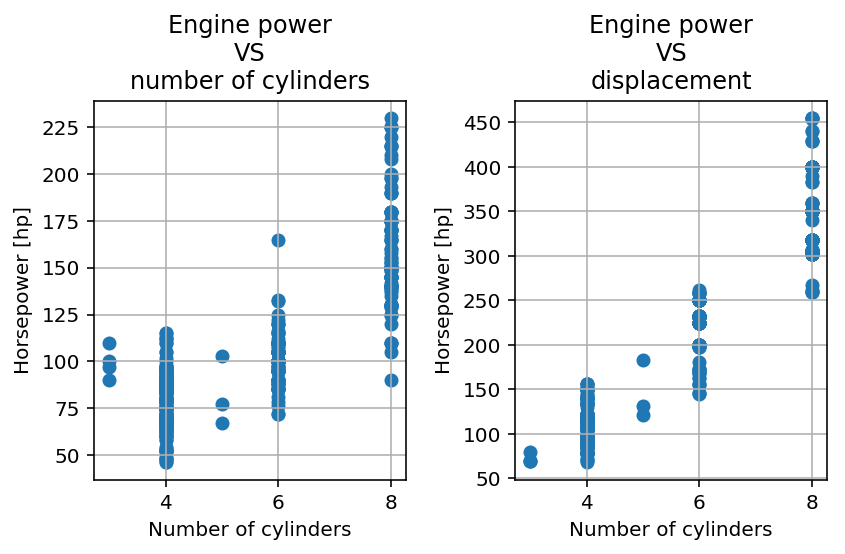

In [642]:
plt.subplot(1,2,1)
plt.scatter(df.iloc[:,cyl],df.iloc[:,hp])
plt.xlabel("Number of cylinders")
plt.ylabel("Horsepower [hp]")
plt.title("Engine power\nVS\nnumber of cylinders")
plt.grid(True)

plt.subplot(1,2,2)
plt.scatter(df.iloc[:,cyl],df.iloc[:,displacement])
plt.xlabel("Number of cylinders")
plt.ylabel("Horsepower [hp]")
plt.title("Engine power\nVS\ndisplacement")
plt.grid(True)

plt.tight_layout()
plt.show()

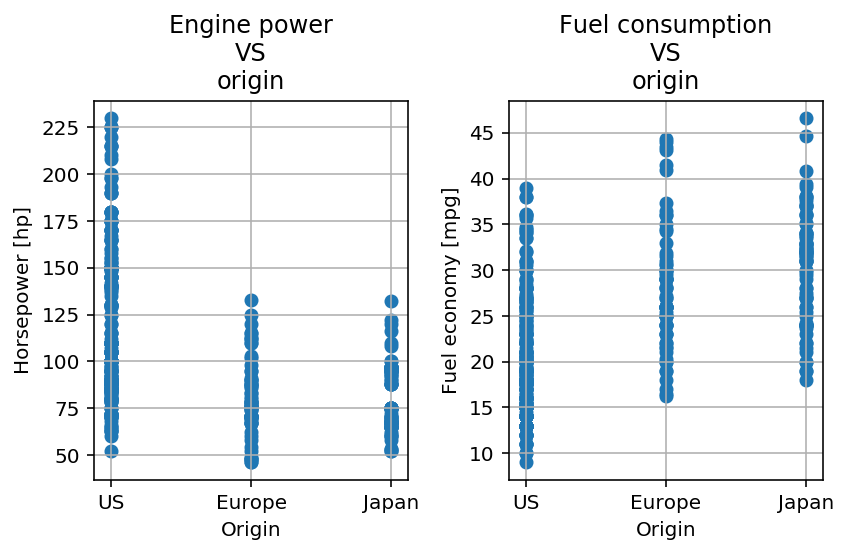

In [643]:
plt.subplot(1,2,1)
plt.scatter(df.iloc[:,origin],df.iloc[:,hp])
plt.xticks([1,2,3], originLabels)
plt.xlabel("Origin")
plt.ylabel("Horsepower [hp]")
plt.title("Engine power\nVS\norigin")
plt.grid(True)

plt.subplot(1,2,2)
plt.scatter(df.iloc[:,origin],df.iloc[:,mpg])
plt.xticks([1,2,3], originLabels)
plt.xlabel("Origin")
plt.ylabel("Fuel economy [mpg]")
plt.title("Fuel consumption\nVS\norigin")
plt.grid(True)

plt.tight_layout()
plt.show()

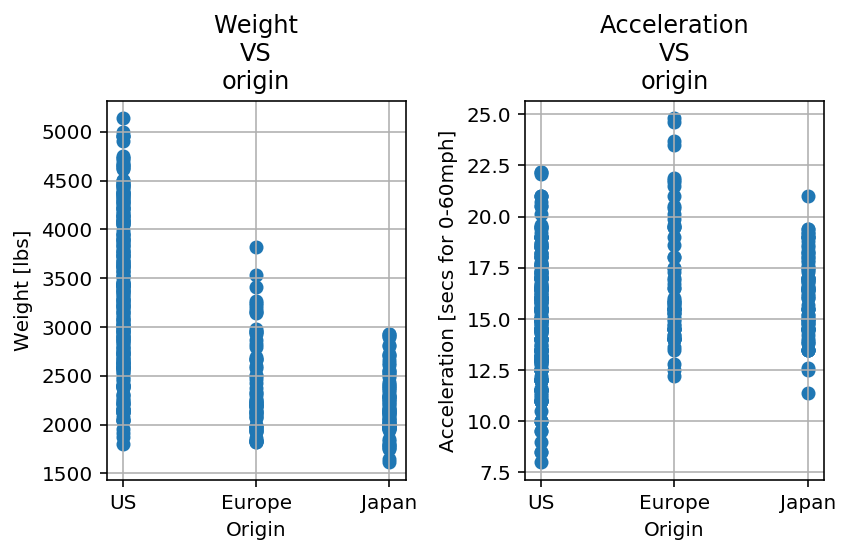

In [644]:
plt.subplot(1,2,1)
plt.scatter(df.iloc[:,origin],df.iloc[:,weight])
plt.xticks([1,2,3], originLabels)
plt.xlabel("Origin")
plt.ylabel("Weight [lbs]")
plt.title("Weight\nVS\norigin")
plt.grid(True)

plt.subplot(1,2,2)
plt.scatter(df.iloc[:,origin],df.iloc[:,acc])
plt.xticks([1,2,3], originLabels)
plt.xlabel("Origin")
plt.ylabel("Acceleration [secs for 0-60mph]")
plt.title("Acceleration\nVS\norigin")
plt.grid(True)

plt.tight_layout()
plt.show()

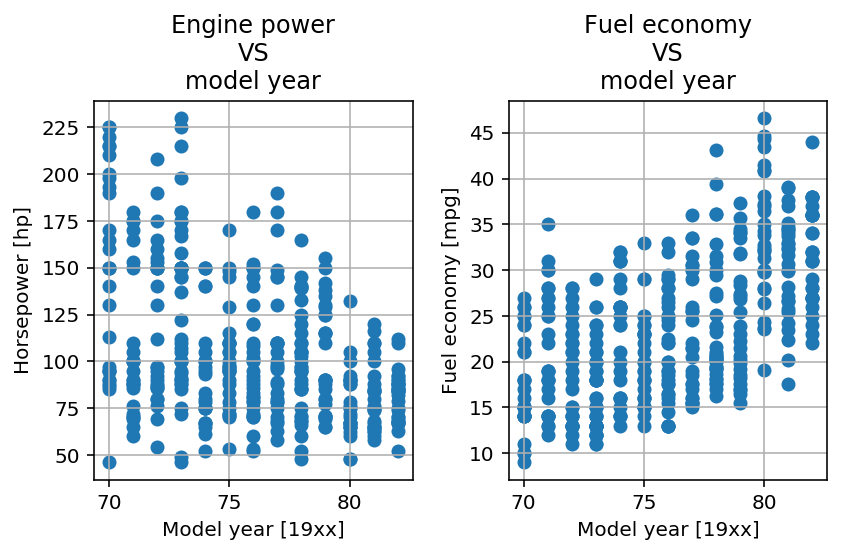

In [645]:
plt.subplot(1,2,1)
plt.scatter(df.iloc[:,year],df.iloc[:,hp])
plt.xlabel("Model year [19xx]")
plt.ylabel("Horsepower [hp]")
plt.title("Engine power\nVS\nmodel year")
plt.grid(True)

plt.subplot(1,2,2)
plt.scatter(df.iloc[:,year],df.iloc[:,mpg])
plt.xlabel("Model year [19xx]")
plt.ylabel("Fuel economy [mpg]")
plt.title("Fuel economy\nVS\nmodel year")
plt.grid(True)

plt.tight_layout()
plt.show()

5) I chose this data set due to my interest in vehicles of older model years. Even though this data set dates back to 1983, most trends that are presented above are partially or entirely true nowadays. For example, as new models are released, the fuel economy gets better and better. Additionally, there is an obvious indication that US-origin vehicles tend to have higher power-rated engines than European or Japanese vehicles. This may be accredited to a large number of SUVs and trucks present in everyday use in the US. Fruthermore, 8-cylinder engines are exclusive to US-made cars - one more observation that almost entirely translates to present date.

6) https://github.com/VukLesi/machine-learning-course